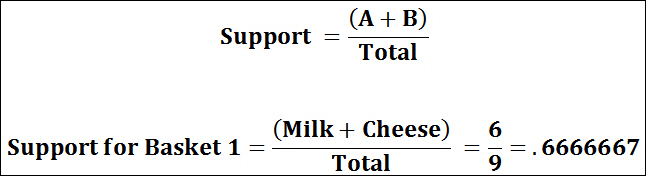

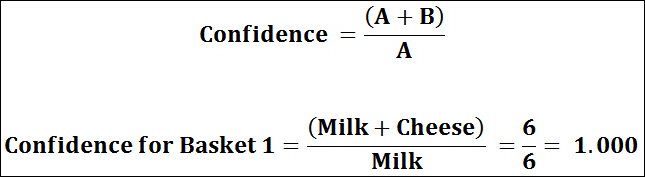

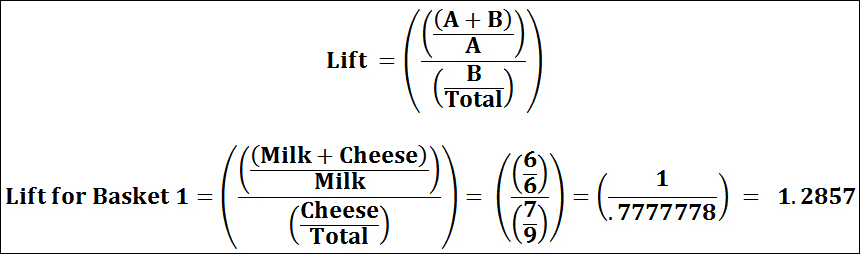

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.__version__

'0.24.2'

In [2]:
df = pd.read_csv('BreadBasket_DMS.csv')

df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


(         Date      Time  Transaction           Item
 0  2016-10-30  09:58:11            1          Bread
 1  2016-10-30  10:05:34            2   Scandinavian
 2  2016-10-30  10:05:34            2   Scandinavian
 3  2016-10-30  10:07:57            3  Hot chocolate
 4  2016-10-30  10:07:57            3            Jam, None)

In [3]:
df['Item'] = df['Item'].str.lower()

In [4]:
x = df['Item'] == "none"
print(x.value_counts())

False    20507
True       786
Name: Item, dtype: int64


In [5]:
df = df.drop(df[df.Item == 'none'].index)

In [6]:
len(df['Item'].unique())

94

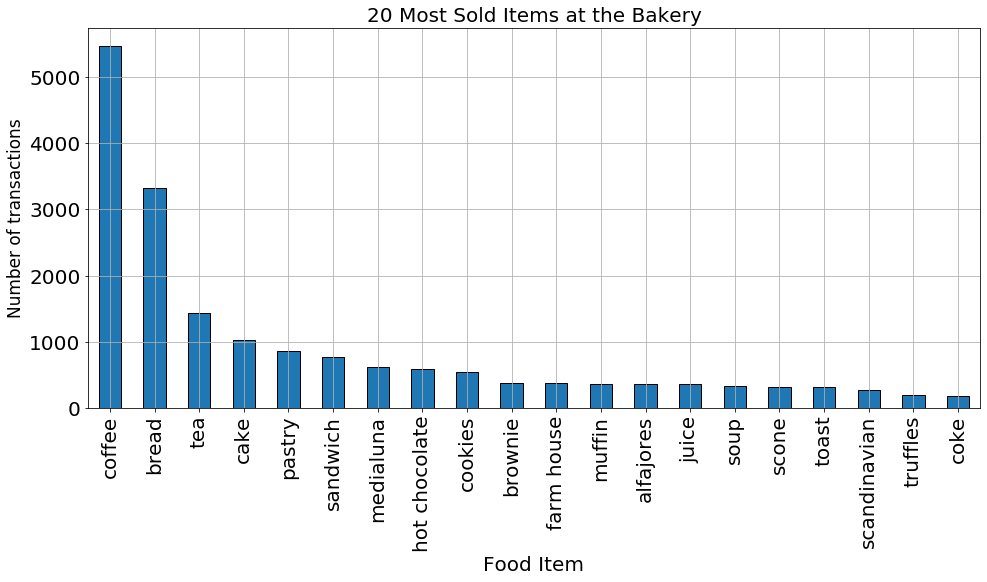

In [7]:
fig, ax=plt.subplots(figsize=(16,7))
df['Item'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1)
plt.xlabel('Food Item',fontsize=20)
plt.ylabel('Number of transactions',fontsize=17)
ax.tick_params(labelsize=20)
plt.title('20 Most Sold Items at the Bakery',fontsize=20)
plt.grid()
plt.ioff()

In [8]:
df['datetime'] = pd.to_datetime(df['Date']+" "+df['Time'])
df['Week'] = df['datetime'].dt.week
df['Month'] = df['datetime'].dt.month
df['Weekday'] = df['datetime'].dt.weekday
df['Hours'] = df['datetime'].dt.hour

In [9]:
df1=df[['Date','Transaction', 'Month','Week', 'Weekday','Hours']]

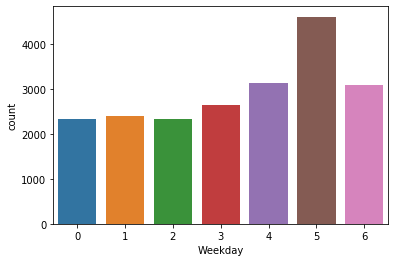

In [10]:
sns.countplot(x='Weekday',data=df1)

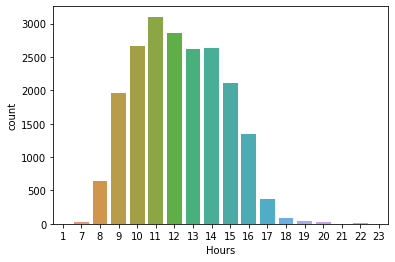

In [11]:
sns.countplot(x='Hours',data=df1)

In [12]:
#!pip install mlxtend

In [13]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [14]:
hot_encoded_df = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [15]:
hot_encoded_df.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)

In [17]:
frequent_itemsets = apriori(hot_encoded_df, min_support=0.01, use_colnames=True)

In [22]:
frequent_itemsets

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
5,0.012995,(chicken stew)
6,0.478394,(coffee)
7,0.019440,(coke)
8,0.054411,(cookies)
9,0.039197,(farm house)


In [18]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
1,(coffee),(alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
2,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
3,(bread),(pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
4,(brownie),(coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
5,(coffee),(brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
7,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
8,(cake),(hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
9,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125


In [23]:
rules[ (rules['lift'] >= 1.01) & (rules['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
12,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
14,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
16,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
26,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
29,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235


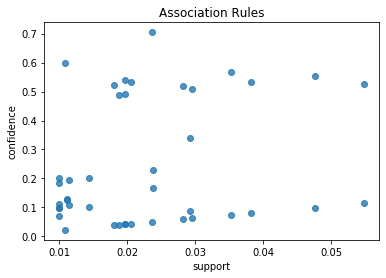

In [25]:
support = rules.as_matrix(columns=['support'])
confidence = rules.as_matrix(columns=['confidence'])
import seaborn as sns

for i in range (len(support)):
    support[i] = support[i]
    confidence[i] = confidence[i]
    
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)

plt.show()